# 데이터 분석 (Data Analysis) - 활용
- import package

 - 사이킷런 패키지

 

 - 아이리스(iris) 데이터

 - 데이터 업로드를 위한 모듈

 - 데이터 업로드

 - 데이터 확인하기

 

 - 데이터 선별

 - 결측치 확인하기

## 데이터 분석

### 1. 탐색적 데이터 분석
#### 1.1 import 패키지
**import 패키지이름 as 별칭**

#### 1.2 아이리스(Iris) 패키지 / '붓꽃'데이터
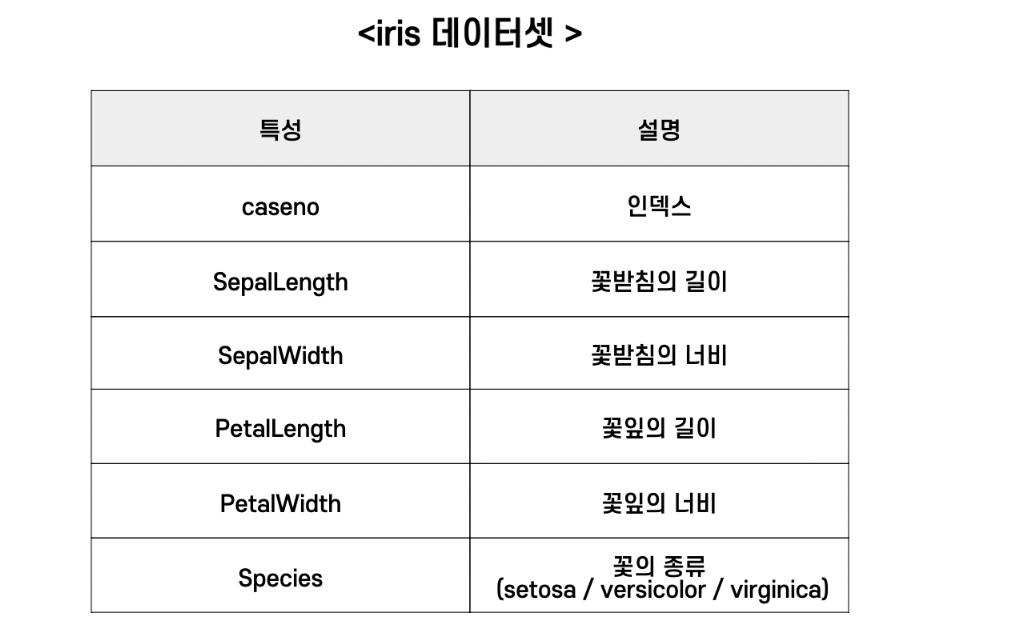

In [3]:
import pandas as pd

# 1) 데이터 확인하기
data = pd.read_csv('D:\data/iris.csv')
data.head()
data.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\data/iris.csv'

In [2]:
# 2) 데이터 탐색하기

# 2.1 데이터 선별 - 원하는 특성 삭제
del data['caseno']
data.head()

NameError: name 'data' is not defined

In [7]:
# 2.2 결측치 확인하기 (isna / isnull)
data.info()
data.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


### 2. 수치형 데이터 탐색

In [8]:
# 2.3 수치형 데이터의 기초 통계량 확인
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

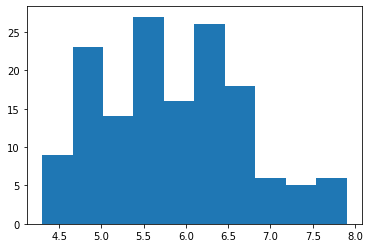

In [12]:
# 2.4 히스토그램
import matplotlib.pyplot as plt
plt.hist(data['SepalLength'])

array([[<AxesSubplot:title={'center':'SepalLength'}>]], dtype=object)

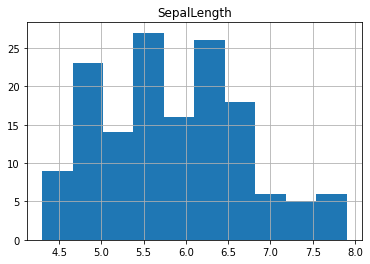

In [14]:
# 2.4 다른 방법
data.hist('SepalLength')

### 3. 범주형 데이터 탐색

In [15]:
# 3.1 빈도 분석
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

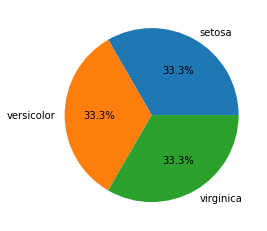

In [17]:
# 3.2 파이 그래프
from matplotlib import pyplot as plt

count = data['Species'].value_counts()
name = count.index
plt.pie(count, labels = name, autopct = '%.1f%%')
plt.show()

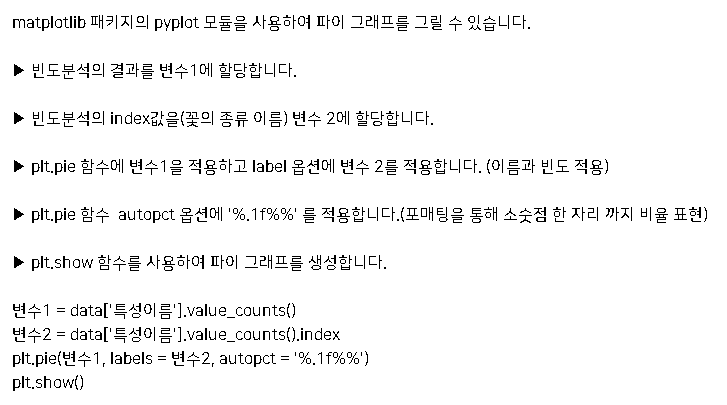

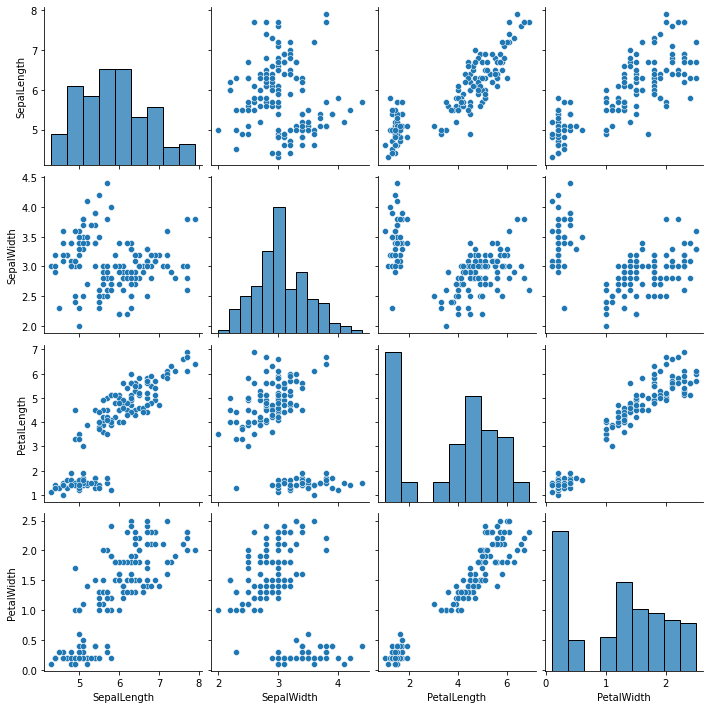

In [18]:
# 3.3 산점도
import seaborn as sns
sns.pairplot(data)

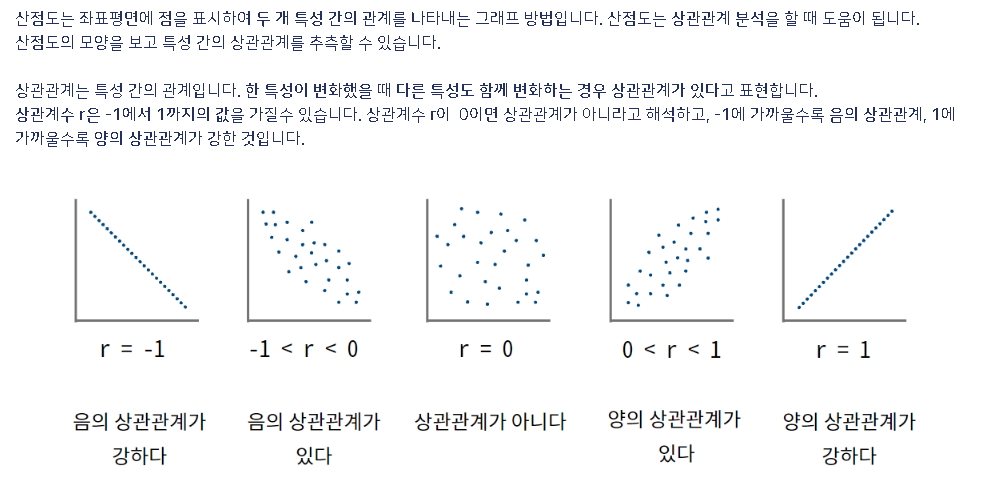

In [19]:
# 상관 계수 표 작성
data.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
PetalWidth,0.817941,-0.366126,0.962865,1.000000


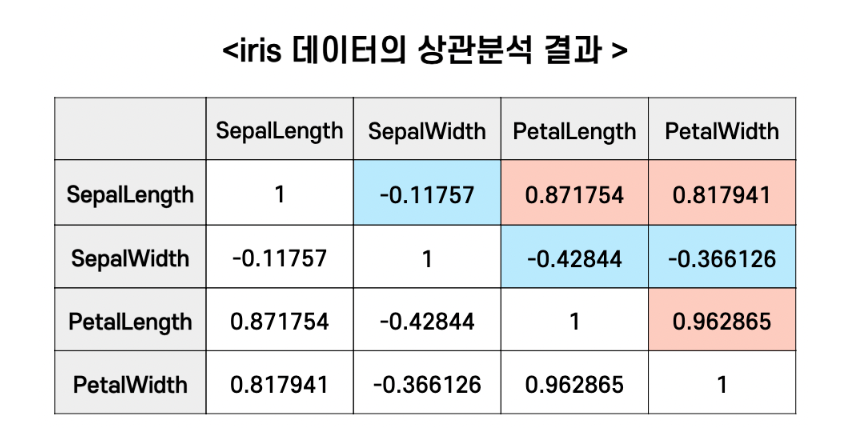

### 4. 그룹별 연산
**data.groupby('그룹범주 특성').연산함수()**

In [21]:
data.groupby('Species').sum()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [22]:
data.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### 5. 그룹별 다양한 연산
**data.groupby('그룹범주특성').agg(['연산함수','연산함수'...])**

In [23]:
data.groupby('Species').agg(['sum','mean','min','max'])

SepalLength                  SepalWidth                   \
                   sum   mean  min  max        sum   mean  min  max   
Species                                                               
setosa           250.3  5.006  4.3  5.8      171.4  3.428  2.3  4.4   
versicolor       296.8  5.936  4.9  7.0      138.5  2.770  2.0  3.4   
virginica        329.4  6.588  4.9  7.9      148.7  2.974  2.2  3.8   

           PetalLength                  PetalWidth                   
                   sum   mean  min  max        sum   mean  min  max  
Species                                                              
setosa            73.1  1.462  1.0  1.9       12.3  0.246  0.1  0.6  
versicolor       213.0  4.260  3.0  5.1       66.3  1.326  1.0  1.8  
virginica        277.6  5.552  4.5  6.9      101.3  2.026  1.4  2.5

#### 원하는 특성만 연산
**data.groupby('그룹별로 보고싶은 열').agg(['연산함수','연산함수'...])[['특성1','특성2',...]]**

In [24]:
# 'Species' 로 그룹을 만들어서 'SepalLength', 'SepalWidth' 특성의 함계(sum), 평균(mean), 최소값(min), 최대값(max) 연산하기

data.groupby('Species').agg(['sum','mean','min','max'])[['SepalLength', 'SepalWidth']]

SepalLength                  SepalWidth                 
                   sum   mean  min  max        sum   mean  min  max
Species                                                            
setosa           250.3  5.006  4.3  5.8      171.4  3.428  2.3  4.4
versicolor       296.8  5.936  4.9  7.0      138.5  2.770  2.0  3.4
virginica        329.4  6.588  4.9  7.9      148.7  2.974  2.2  3.8

### 6. 데이터 변환

#### 범주형 데이터를 수치형 데이터로 변환하기
**pd.get_dummies(data)**

In [27]:
data_dummy = pd.get_dummies(data)
data_dummy

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_setosa,Species_versicolor,Species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [28]:
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### 수치형 데이터를 범주형 데이터로 변환하기
**data['새로운특성이름'] = pd.cut(data['수치형특성'], 기준점 변수, labels = 범주값변수))**

- 기준점 변수 = [기준점 1, 기준점 2, 기준점 3, 기준점 4]
- 범주값 변수 = [범주값 1, 범주값 2, 범주값 3]

- 범주값 1은 기준점 1과 2 사이 / 범주값 2는 기준점 2와 3 사이 / 범주값 3은 기준점 3과 4 사이

In [ ]:
# age_cut 변수에 19, 29, 39, 49를 리스트로 할당해보세요
age_cut = [19, 29, 39, 49]

In [ ]:
# age_label 변수에 '20대', '30대','40대'를 리스트로 할당해보세요
age_label = ['20s', '30s','40s']

In [ ]:
# cut 함수에 age_cut 변수와 age_label 변수를 활용하여 age 특성을 age_group 특성에 할당해 보세요
data['age_group'] = pd.cut(data['age'], age_cut, labels = age_label)

## 데이터 시각화 (visualization)
### 1. 그래프 종류

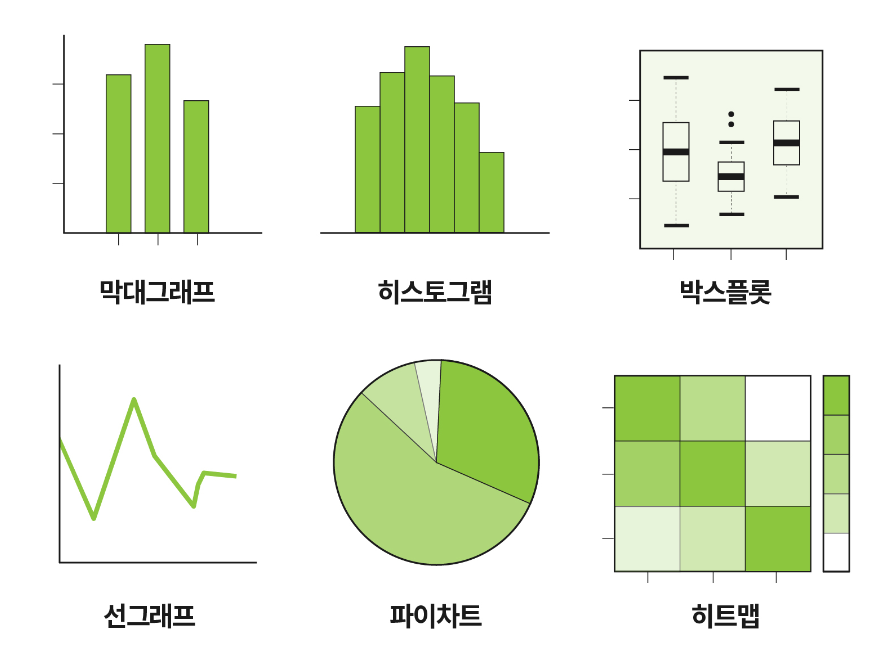
1) 막대그래프 : 여러 범주 값들의 빈도를 비교 
    - 가로: 범주, 세로: 범주의 빈도
    
---
2) 히스토그램 : 데이터의 분포를 표로 나타냄(수치형) 
    - 가로: 데이터 구간, 세로: 구간별 데이터 수치
    
---
3) 박스플롯 : 수치형 데이터의 분포를 보여주기 위함, 히스토그램과 비슷한 용도로 사용 
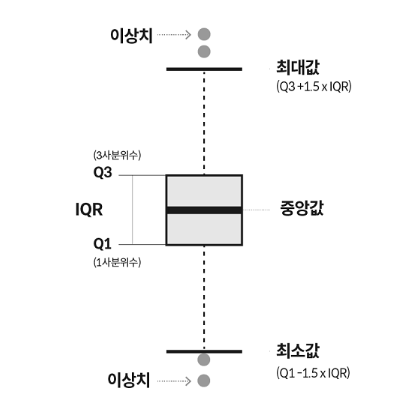
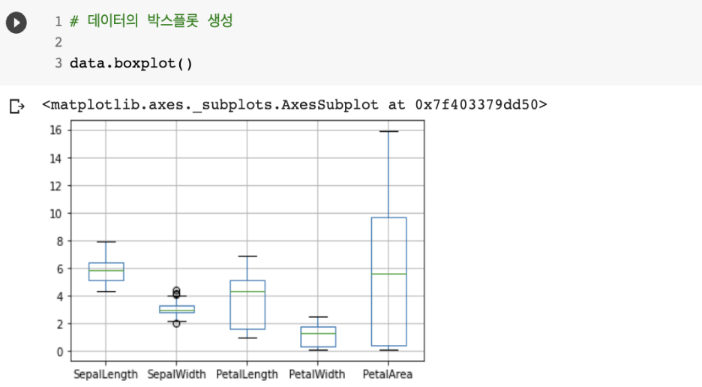
- 최소값, 1사분위값, 2사분위값, 3사분위값, 최대값 표현 가능

---
4) 선그래프 : 수량을 점으로 표시하고 그 점들을 선으로 이음
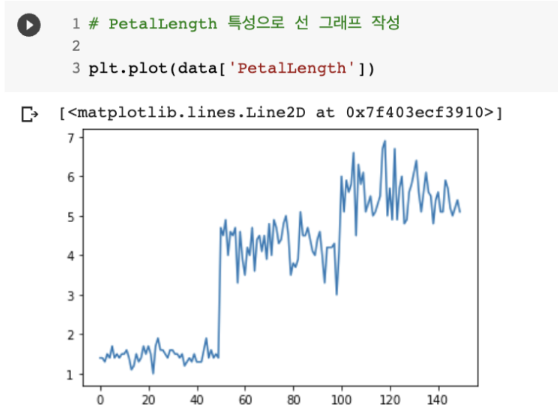
- 시간에 따라 지속적으로 변화하는 것을 표현

---
5) 파이차트 : 전체에 대한 각 부분의 비율을 백분율로 나타냄

---
6) 히트맵 : 수치에 따라 다른 색으로 데이터 표현
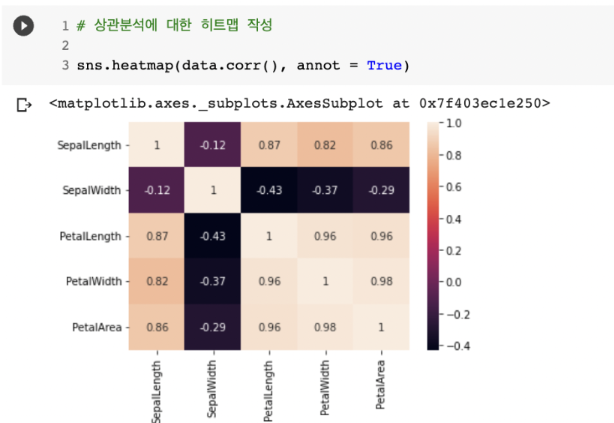
- 가로축과 세로축 이외에 색이라는 요소를 추가로 사용하기 때문에 시각적으로 패턴파악 가능

### 2. 그래프 이름
#### 2.1. 그래프 제목

    x = data['특성이름'].value_counts().index
    y = data['특성이름'].value_counts()
    plt.bar(x, y)
    plt.title('그래프이름', fontsize = 폰트크기)
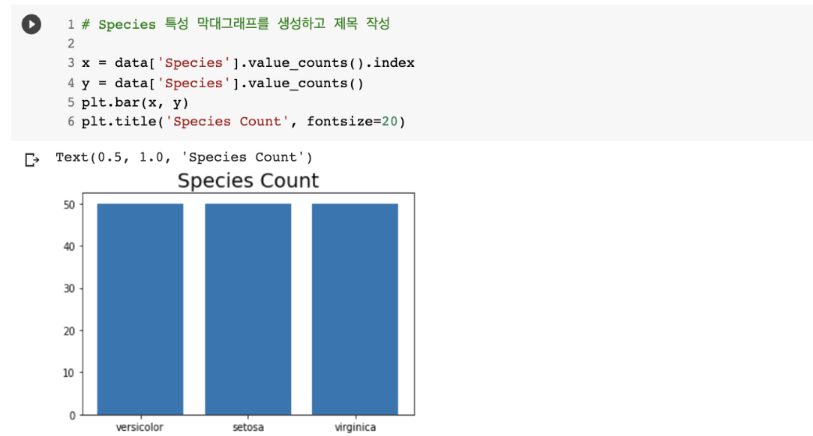


---
#### 2.2 그래프 축 이름 추가
    x = data['특성이름'].value_counts().index
    y = data['특성이름'].value_counts()
    plt.bar(x, y)
    plt.title('그래프이름', fontsize = 폰트크기)
    plt.xlabel('x축이름', fontsize = 폰트크기)
    plt.ylabel('y축이름', fontsize = 폰트크기)
    
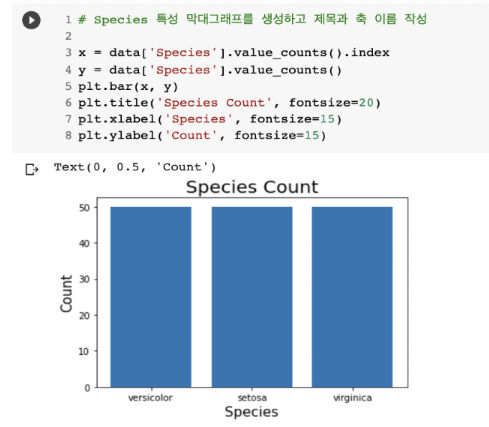

---
#### 2.3 그래프 색
- 색상표
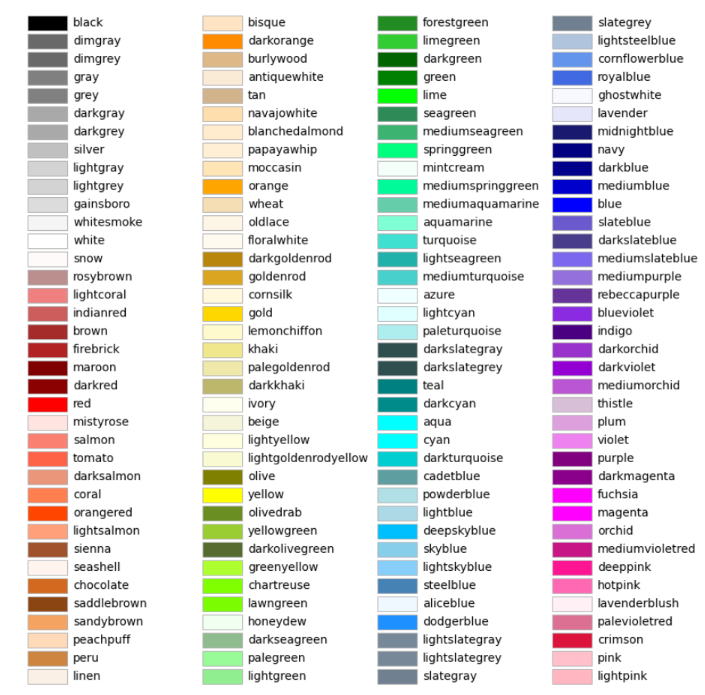

---
#### 2.4 그래프 색상 지정
    x = data['Species'].value_counts().index
    y = data['Species'].value_counts()
    plt.bar(x, y, color = ['색1', '색2', '색3'])
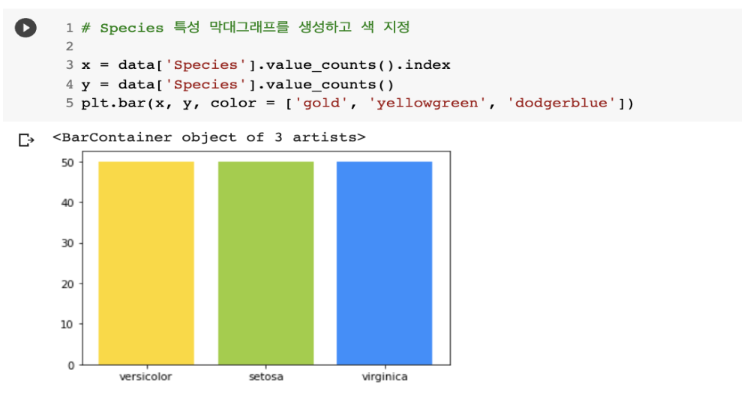    

---
#### 2.5 그래프 두께
    x = data['Species'].value_counts().index
    y = data['Species'].value_counts()
    plt.bar(x, y, width = 두께숫자)
    
- bar 함수 안에 width 옵션으로 두께를 지정
- 아무런 옵션을 넣지 않았을 때는 0.8이 기본값(default)로 설정
- 숫자가 너무 크면  막대가 겹칠 수 있으니 적절하게 조절할 필요가 있음

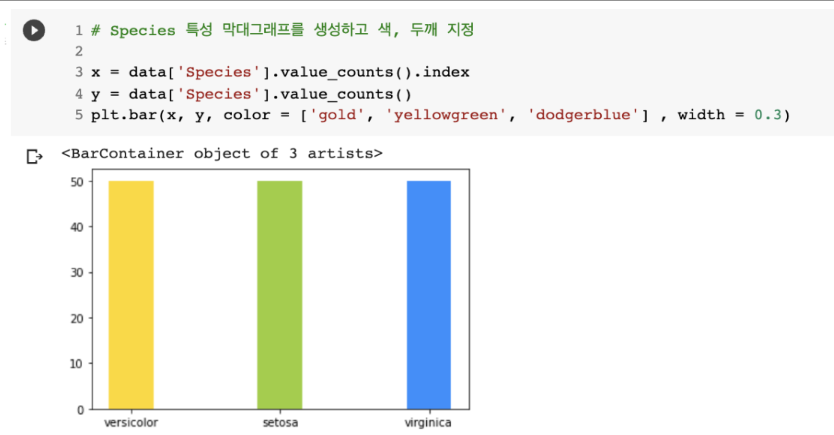    

---
#### 2.6 그래프 가로로 표현
    x = data['Species'].value_counts().index
    y = data['Species'].value_counts()
    plt.barh(x, y)
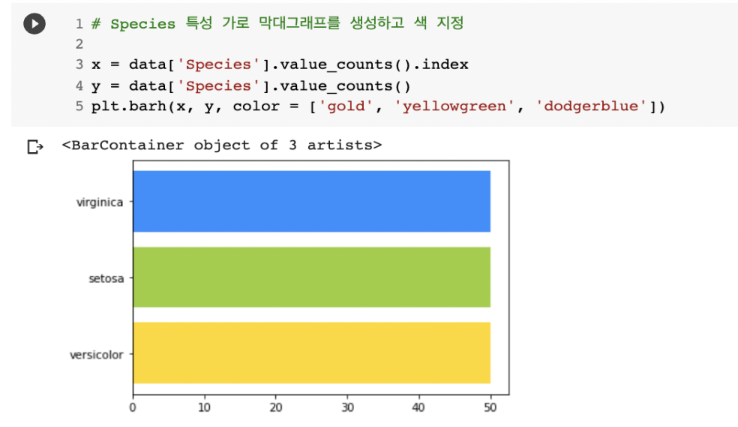

## 분석과정 리뷰
### 1.  데이터 준비 및 정리

 1) 필요 패키지 불러오기 (import)

 2) 데이터 업로드 (files.upload)

 3) 데이터 할당 (pd.read_csv)

 4) 데이터 구성 확인 (info)

 5) 결측치 확인 (isna)



### 2. 데이터 탐색

 1) 수치형 특성 살펴보기 (describe, plt.hist)

 2) 범주형 특성 살펴보기 (value_counts, plt.bar, plt.pie)

 3) 상관관계 살펴보기 (sns.pairplot, corr)

 4) 그룹별로 살펴보기 (groupby, aggregate)



### 3. 데이터 시각화

 1) 박스플롯 (plt.boxplot)

 2) 히트맵 (sns.heatmap)

 3) 이름 추가 (plt.title, plt.xlabel, plt.ylabel)

 4) 색상 추가 (color 옵션)